In [1]:
import numpy as np
import networkx as nx
import random
import pandas as pd
import matplotlib.pyplot as plt

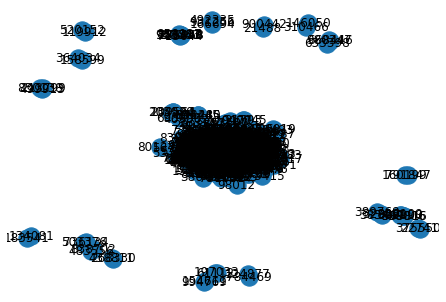

In [2]:
df = pd.read_csv('instaglam_1.csv')
G = nx.from_pandas_edgelist(df, source = "userID", target = "friendID" )
# color_map = []
# for node in G:
#     if node == 145:
#         color_map.append('blue')
#     else: 
#         color_map.append('green')      
# nx.draw(G, node_color=color_map, with_labels=True)
nx.draw(G, with_labels=True)




# nx.draw(G,pos,with_labels = True)
# plt.savefig('graph.png', dpi = 1000)


In [3]:
# nx.clustering(G)

In [4]:
dick = nx.triangles(G)
val = dick.values()
total = sum(val)
total


59070

In [5]:
print(nx.transitivity(G))

0.13375631759143525


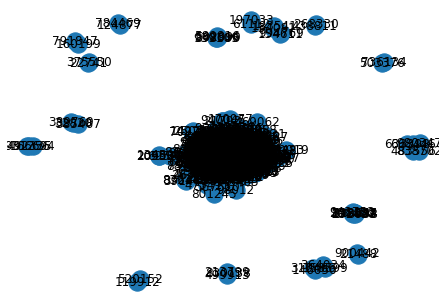

In [6]:
df0 = pd.read_csv('instaglam0.csv')
G0 = nx.from_pandas_edgelist(df0, source = "userID", target = "friendID" )
nx.draw(G0,with_labels = True)


In [7]:
print(nx.transitivity(G0))

0.14532035013207645


In [8]:
dick0 = nx.triangles(G0)
val0 = dick0.values()
total0 = sum(val0)
total0


84171

In [9]:
G.number_of_edges()

12717

In [10]:
G0.number_of_edges()

14324

In [11]:
G.number_of_edges()-G0.number_of_edges()

-1607

In [12]:
1607/1147665

0.001400234388954965

### נסיון 2 של שחר ועופר


In [13]:
nx.number_connected_components(G)

20

In [14]:
nx.number_connected_components(G0)

20

ניתן לראות שמעבר בין מצב -1 לבין מצב 0 מספר רכיבי הקישורת לא קטן. ידוע כי קשתות רק נוצרות ולא נמחקות ולכן אנו מסיקים שההסתברות ליצירת קשת  בין שני רכיבי קשירות בגרף היא 0

#### בתוך רכיבי קשירות

In [15]:
M = nx.Graph()

In [16]:
M.add_edges_from([('a','b') , ('b','c'), ('b','d'), ('a','e'), ('e','d')])


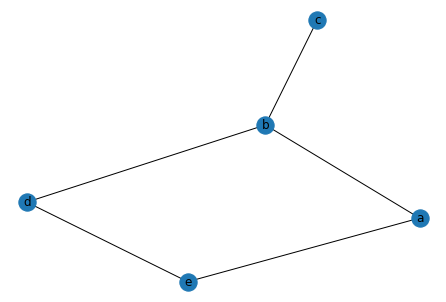

In [17]:
nx.draw(M,with_labels = True)

In [18]:
nx.set_node_attributes(M,0,"hodbak")
nx.set_node_attributes(M,"hod",0)

# nx.set_node_attributes(M, {'b':{'hodbak':1}})
a = nx.get_node_attributes(M,"hodbak")
a


{'a': 0, 'b': 0, 'c': 0, 'd': 0, 'e': 0}

In [19]:
list1 = nx.triangles(M)
list1

{'a': 0, 'b': 0, 'c': 0, 'd': 0, 'e': 0}

In [20]:
nx.transitivity(M)

0

In [21]:
def get_open_triangles_node(G, node):
    open_triangles = []
    neighbors1 = set(G.neighbors(node))

    for node1 in neighbors1:
        # remove the target node from the target node's neighbor's
        # neighbor's, since it will certainly go back to itself
        neighbors2 = set(G.neighbors(node1))
        neighbors2.discard(node)

        for node2 in neighbors2:
            neighbors3 = set(G.neighbors(node2))

            if node not in neighbors3:
                open_triangle = set([node])
                open_triangle.update([node1, node2])
                open_triangles.append(open_triangle)
    
    return len(open_triangles)

In [22]:
def count_open_triangles(G):
    count = 0
    nodes = list(G.nodes)
    for node in nodes:
        count += get_open_triangles_node(G, node)
    return int(count/2)

In [23]:
count_open_triangles(M)

6

In [24]:
count_open_triangles(G)

382554

In [25]:
nx.transitivity(G)

0.13375631759143525

In [26]:
dick = nx.triangles(G)
val = dick.values()
total = sum(val)
total/3

19690.0

In [27]:
def prob(G,u,v):
    return len(sorted(nx.common_neighbors(G,u,v)))/count_open_triangles(G)
    

In [28]:
prob(M,'a','b')

0.0

In [56]:
S = [G.subgraph(c).copy() for c in nx.connected_components(G)]
# nx.draw(S[0],with_labels = True)
# nodes1 = list(S[0].nodes)
# nodes2 = list(S[0].nodes)
# list_of_prob = []
# open_t = count_open_triangles(S[0])
# for n1 in nodes1:
#     for n2 in nodes2:
#         if n1 != n2:
#             prob1 = len(sorted(nx.common_neighbors(G,n1,n2)))/open_t
#             temp = (prob1,n1,n2)
#             list_of_prob.append(temp)
# list_of_prob


In [110]:
S0 = [G0.subgraph(c).copy() for c in nx.connected_components(G0)]
# nx.draw(S0[17],with_labels = True)
len(S0[19].edges)
# prob(S0[17], 939109,898006)

2

In [31]:
nodes1 = list(S[0].nodes)
list_of_prob = []
# open_t = count_open_triangles(S[0])
histogram = [0]*1000
every_group = [[0]]*1000
for i in range(len(nodes1)):
    for j in range(i, len(nodes1)):
        n1 = nodes1[i]
        n2 = nodes1[j]
        if n1 != n2 and (n2 not in S[0].neighbors(n1)):
            num = len(sorted(nx.common_neighbors(S[0], n1, n2)))
            if num != 0:
                histogram[num] += 1
                if every_group[num] == [0]:
                    every_group[num] = [[n1,n2]]
                else:
                    every_group[num].append([n1,n2])
histogram

[0,
 121001,
 31485,
 14233,
 7839,
 4919,
 3304,
 2225,
 1619,
 1175,
 820,
 619,
 434,
 355,
 277,
 171,
 136,
 97,
 86,
 62,
 41,
 26,
 20,
 15,
 14,
 11,
 5,
 5,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0

In [32]:
# # for i in range(len(histogram)):
# #      histogram[i] = histogram[i]/2
# # histogram
# every_group


In [33]:

# for i in range(1,1000):
#     for edge in every_group[i]:
#         if type(edge) == int:
#             print(edge)


#the problem was that inside every_group[i] there were elements with onlye zero as integer
# so i wrote if type(edege) == int
#                every_group[i].remove(edge)

In [34]:
moneh = [0]*1000
L = list(S0[0].edges())


for i in range(1,1000): ## possible to use 50 instead of 1000
    for edge in every_group[i]:
        if type(edge) != int:
            temp = (edge[0], edge[1])
            if G0.has_edge(temp[0], temp[1]):
                moneh[i] +=1

moneh

[0,
 0,
 475,
 312,
 216,
 156,
 115,
 83,
 52,
 55,
 46,
 24,
 25,
 15,
 9,
 7,
 5,
 4,
 6,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,

In [35]:
sum(moneh) # מספר הקשתות הכולל שנוצרו שווה למספר הקשתות שנסגרו עקב סגירת משולש כלשהו. נכונות המודל 

1607

In [36]:
prob = [0]*1000
for i in range(0,1000):
    if histogram[i]!= 0:
        prob[i] = moneh[i] / histogram[i]
prob


[0,
 0.0,
 0.015086549150389074,
 0.021920888077004146,
 0.027554535017221583,
 0.03171376295995121,
 0.03480629539951574,
 0.037303370786516854,
 0.03211859172328598,
 0.04680851063829787,
 0.05609756097560976,
 0.03877221324717286,
 0.0576036866359447,
 0.04225352112676056,
 0.032490974729241874,
 0.04093567251461988,
 0.03676470588235294,
 0.041237113402061855,
 0.06976744186046512,
 0.016129032258064516,
 0.0,
 0.0,
 0.05,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 

In [37]:
p = prob[:23]
x = np.mean(p)
for i in range(3,1000):
    if prob[i] == 0.0:
        prob[i] = x
        

In [38]:
prob

[0,
 0.0,
 0.015086549150389074,
 0.021920888077004146,
 0.027554535017221583,
 0.03171376295995121,
 0.03480629539951574,
 0.037303370786516854,
 0.03211859172328598,
 0.04680851063829787,
 0.05609756097560976,
 0.03877221324717286,
 0.0576036866359447,
 0.04225352112676056,
 0.032490974729241874,
 0.04093567251461988,
 0.03676470588235294,
 0.041237113402061855,
 0.06976744186046512,
 0.016129032258064516,
 0.03171149679932506,
 0.03171149679932506,
 0.05,
 0.03171149679932506,
 0.03171149679932506,
 0.03171149679932506,
 0.03171149679932506,
 0.03171149679932506,
 0.03171149679932506,
 0.03171149679932506,
 0.03171149679932506,
 0.03171149679932506,
 0.03171149679932506,
 0.03171149679932506,
 0.03171149679932506,
 0.03171149679932506,
 0.03171149679932506,
 0.03171149679932506,
 0.03171149679932506,
 0.03171149679932506,
 0.03171149679932506,
 0.03171149679932506,
 0.03171149679932506,
 0.03171149679932506,
 0.03171149679932506,
 0.03171149679932506,
 0.03171149679932506,
 0.031711

In [188]:
def simulate_edge_creation(G,prob):
    new_G = nx.create_empty_copy(G, with_data = True)
    nodes1 = list(G.nodes)
    for i in range(len(nodes1)):
        for j in range(i, len(nodes1)):
            n1 = nodes1[i]
            n2 = nodes1[j]
            if n1 != n2 and G.has_edge(n1,n2) == False:
                common_friends = len(sorted(nx.common_neighbors(G, n1, n2)))
                rand_num = np.random.rand()
                if rand_num < prob[common_friends]:
                    new_G.add_edge(n1,n2)
                    
    G.add_edges_from(new_G.edges)            
            
    
    

In [58]:
# len(S0[0].edges())
# new_G = simulate_graph(S[0],prob)
# len(new_G.edges())


# new_G = nx.create_empty_copy(S0[0], with_data = True)
# new_G.add_edges_from(S0[0].edges)

len(new_G.edges())
# len(S[0].edges())



14331

In [ ]:
S = [G.subgraph(c).copy() for c in nx.connected_components(G)]
# p = prob[:23]
# np.mean(p)
# p

###### part 2  - attributes and grades 

In [328]:
##general function
spot = pd.read_csv('spotifly.csv', index_col = False)
artist_num = 16326
new_spot=spot[spot[' artistID']==artist_num]
new_spot = new_spot.reset_index(drop=True)
values =new_spot.values.tolist()

In [339]:
S0 = [G0.subgraph(c).copy() for c in nx.connected_components(G0)]

In [340]:
nx.set_node_attributes(S0[0],0,"h")
nx.set_node_attributes(S0[0],0,"bought")
nx.set_node_attributes(S0[0],0,"grade")

res_dct = {values[i][0]:values[i][2] for i in range(0,len(values))}    
dic1 = {}
for value in values:
    dic1[value[0]] = {'h':value[2]}


{12494: 7,
 52457: 129,
 91959: 54,
 162715: 44,
 168383: 64,
 235126: 36,
 310466: 277,
 360291: 95,
 497095: 341,
 533032: 7,
 539688: 183,
 615373: 12,
 642482: 413,
 652256: 27,
 831962: 53,
 886976: 9,
 887152: 60,
 900354: 101,
 915822: 11,
 925352: 78,
 984969: 298}

In [330]:
nx.set_node_attributes(S0[0],dic1)
S0[0].nodes[514611]['h']

0

In [331]:
def artist_grade(G,node1,listen_to_artist):
    count = 0
    for listener in listen_to_artist:
        if listener!= node1:
            d = nx.shortest_path_length(G, source = node1, target = listener)
            h_grade = G.nodes[listener]['h'] - 1000
            count += (1/d)*h_grade
        
    return count / len(listen_to_artist)
        

In [122]:
# nodes1 = list(S0[0].nodes)
# L = []
# for node in nodes1:
#     if S0[0].nodes[node]['h'] != 0:
#         L.append(node)
        

1.7947089947090027

In [332]:
def create_grade(G):
    nodes1 = list(G.nodes)
    L = []
    for node in nodes1:
        if G.nodes[node]['h'] != 0:
            L.append(node)
    artists = []
    deg = []
    for node in nodes1: # for normalization purposes
        artists.append(artist_grade(G,node,L))
        deg.append(G.degree[node])
     
    max_deg = max(deg)
    max_artist = max(artists)
    min_artists = -999
    
    for node in nodes1:
        a = artist_grade(G,node,L)
        if a >= 0:
            a = a / max_artist
        else:
            a = a/min_artists
        c = nx.closeness_centrality(G, node) 
        d = G.degree[node] / max_deg
        x = (0.2* a + 0.4*c+ 0.4*d)
#         x = (a +c+d)/3

        G.nodes[node]['grade'] = x
        
    
        
    
    
        
        
        
    

In [333]:
create_grade(S0[0])
dic = nx.get_node_attributes(S0[0], 'grade')
dic

sorted(dic, key=dic.get, reverse = True)



[548221,
 874459,
 411093,
 999659,
 175764,
 441435,
 983433,
 473614,
 983003,
 672617,
 473629,
 338687,
 229032,
 954515,
 852394,
 228705,
 601148,
 32806,
 291936,
 189144,
 308470,
 798855,
 705172,
 412878,
 575027,
 776400,
 555524,
 249667,
 905328,
 777914,
 525454,
 536587,
 366716,
 685281,
 146170,
 731718,
 563940,
 502190,
 197117,
 865448,
 913587,
 565110,
 940112,
 387451,
 457566,
 70766,
 495790,
 38878,
 105294,
 322877,
 117383,
 84149,
 694461,
 975852,
 682482,
 705632,
 73989,
 385510,
 478885,
 645071,
 193676,
 606675,
 815960,
 978744,
 648400,
 608983,
 468812,
 624871,
 394843,
 264058,
 898004,
 199796,
 265474,
 507005,
 312559,
 638857,
 377319,
 518855,
 748485,
 495692,
 381409,
 548544,
 628474,
 425517,
 875987,
 685438,
 680069,
 812593,
 733993,
 466173,
 778023,
 408206,
 760280,
 602238,
 46049,
 533032,
 131162,
 330596,
 314971,
 560009,
 40242,
 588774,
 106869,
 679489,
 23096,
 961018,
 157906,
 575684,
 240913,
 74425,
 60438,
 654577,
 6

In [162]:
BLOB = sorted(dic.values(),reverse = True)
np.median(BLOB)

0.14212113740505392

### part 3  - infected mashroom

In [334]:
#nadbik lifney
# infection describes the infection in specific round of t

def infection(G):
    infected_list = []
    nodes1 = list(G.nodes)
    for node in nodes1:
        if G.nodes[node]['bought'] != 1:
            n_list = list(G.neighbors(node))
            nt = len(n_list)
            bt = 0
            for neighbor in n_list:
                if G.nodes[neighbor]['bought'] == 1:
                    bt+=1
            h = G.nodes[node]['h']
        
            if h == 0:
                infection_prob = bt/nt
            else:
                infection_prob = (h*bt) / (1000*nt)
        
            u = np.random.rand()
        
            if u <= infection_prob:
                infected_list.append(node)
    
        for node in infected_list:
            G.nodes[node]['bought'] = 1

        
    
    

    

In [335]:
S0[0].nodes[548221]['bought'] = 1
S0[0].nodes[874459]['bought'] = 1
S0[0].nodes[411093]['bought'] = 1
S0[0].nodes[999659]['bought'] = 1
S0[0].nodes[175764]['bought'] = 1
# r = infection(S0[0])
# r

#  145,
#  31383,
#  32813,
#  84149,
#  105294 

#548221 411093  874459  312559 441435 good 5 

## good 5 for artist 16326:
#548221,  874459,  411093, 999659, 175764,


 
 

In [336]:
def simulate_graph(G,prob):
    create_grade(G)
    for i in range(5):
        simulate_edge_creation(G,prob) ## from t= 0 to t=1
        infection(G)
    nodes1 = list(G.nodes)
    count = 0
    for node in nodes1:
        if G.nodes[node]['bought'] == 1:
            count+=1
    return count / len(nodes1)
    
    

In [338]:
nn =simulate_graph(G0,prob)
nn

KeyError: 'h'